GRUNITZKI, Ricardo et al. Ferramenta web para determinação do índice de qualidade de água a partir da reestruturação das equações que descrevem as curvas dos indicadores de qualidade. XX Simpósio Brasileiro de Recursos Hídricos, Bento Gonçalves, RS, 2013.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def qO2(O2):
    if O2 >= 140:
        qO2 = 47
    else:
        A = 100.8
        B = -106
        C = -3745 
        qO2 = A*np.exp((O2 + B)**2/C)
    return qO2

In [23]:
def qCF(CF):
    if CF >= 1E5:
        qCF = 3
    else:
        A = 98.03
        B = -36.45
        C = 3.138
        D = 0.06776
        qCF = A + B*np.log10(CF) + C*np.log10(CF)**2 + D*np.log10(CF)**3
    return qCF

In [24]:
def qpH(pH):
    if pH > 12:
        qpH = 3
    elif pH < 2:
        qpH = 2
    else:
        A = 0.05421
        B = 1.23
        C = -0.09873
        qpH = A*pH**(B*pH + C*pH**2) + 5.213
    return qpH

In [25]:
def qDBO(DBO):
    if DBO > 30:
        qDBO = 2
    else:
        A = 102.6
        B = -0.1101
        qDBO = A*np.exp(B*DBO)
    return qDBO

In [26]:
def qP(P_total):
    if P_total > 10:
        qP_total = 1
    else:
        A = 213.7
        B = -1.680
        C = 0.3325
        qP_total = A*np.exp(B*P_total**C)
    return qP_total

In [27]:
def qN(N_total):
    if N_total > 100:
        qN_total = 1
    else:
        A = 98.96
        B = -0.2232
        C = -0.006457
        qN_total = A*N_total**(B + C*N_total)
    return qN_total

In [28]:
def qTurb(Turb):
    if Turb > 100:
        qTurb = 5
    else:
        A = 97.34
        B = -0.01139
        C = -0.04917
        qTurb = A*np.exp(B*Turb + C*np.sqrt(Turb))
    return qTurb

In [144]:
def qTemp(Temp):
    if Temp > 15:
        qTemp = 9
#    elif Temp < -5:
#        qTemp = 1
    else:
        A = 0.0003869
        B = 0.1815
        C = 0.01081
        qTemp = 1/(A*(Temp+B)**2+C)
    return qTemp

In [30]:
def qST(Solido_total):
    if Solido_total > 500:
        qSol_total = 32
    else:
        A = 80.26
        B = -0.00107
        C = 0.03009
        D = -0.1185
        qSol_total = A*np.exp(B*Solido_total + C*np.sqrt(Solido_total)) + D*Solido_total
    return qSol_total

## Inserção de dados da amostra

In [286]:
O2 = 85
CF = 1E2
pH = 6
DBO = 10
P_total = 4
N_total = 3
Turb = 51
Temp_diff = 0
ST = 20

## Organização dos dados em listas e cálculo do IQA

In [287]:
# Notas de qualidade de cada categoria
q = [qO2(O2), qCF(CF), qpH(pH), qDBO(DBO), qP(P_total), qN(N_total), qTurb(Turb), qTemp(Temp_diff), qST(ST)]

# pesos de cada categoria
w = [0.17, 0.15, 0.12, 0.10, 0.10, 0.10, 0.10, 0.08, 0.08]

#Cálculo do IQA
IQA = 1
for i in range(len(q)):
    IQA *= q[i] ** w[i]

Resultados finais da amostra

Classificação da qualidade da água

In [288]:
from colorama import Fore, Back, Style

if IQA > 79 and IQA <= 100:
    classificacao = 'ótima'
    print('Índice de qualidade da água (IQA): '+Back.BLUE + Fore.WHITE + '{:.1f}'.format(IQA)+ Style.RESET_ALL)
elif IQA > 51 and IQA <= 79:
    classificacao = 'boa'
    print('Índice de qualidade da água (IQA): '+Back.GREEN + Fore.BLACK + '{:.1f}'.format(IQA)+ Style.RESET_ALL)
elif IQA > 36 and IQA <= 51:
    classificacao = 'regular'
    print('Índice de qualidade da água (IQA): '+Back.YELLOW + Fore.BLACK + '{:.1f}'.format(IQA)+ Style.RESET_ALL)
elif IQA > 19 and IQA <= 36:
    classificacao = 'ruim'
    print('Índice de qualidade da água (IQA): '+Back.RED + Fore.WHITE + '{:.1f}'.format(IQA) + Style.RESET_ALL)
elif IQA <= 19:
    classificacao = 'péssima'
    print('Índice de qualidade da água (IQA): '+Back.MAGENTA+ Fore.WHITE + '{:.1f}'.format(IQA)+ Style.RESET_ALL)

print(f'A amostra apresenta qualidade {classificacao}.')

Índice de qualidade da água (IQA): 51.2
A amostra apresenta qualidade boa.
Verifique a qualidade da amostra e se necessário, consulte a tabela de qualidade para saber mais.


# Gráficos de qualidade da água

In [133]:
# Definição dos intervalos de valores para cada parâmetro
# Define x values
x_values = {
    'qO2': np.linspace(0, 200, 500),
    'qCF': np.linspace(1, 500000, 200000),
    'qpH': np.linspace(0, 14, 1000),
    'qDBO': np.linspace(0, 35, 1000),
    'qP': np.linspace(0.1, 15, 500),
    'qN': np.linspace(0.1, 120, 500),
    'qTurb': np.linspace(0, 120, 1000),
    'qTemp': np.linspace(-10, 20, 1000),
    'qST': np.linspace(0, 600, 1000)
}

# Define functions
functions = {
    'qO2': qO2,
    'qCF': qCF,
    'qpH': qpH,
    'qDBO': qDBO,
    'qP': qP,
    'qN': qN,
    'qTurb': qTurb,
    'qTemp': qTemp,
    'qST': qST
}

# Initialize data_graf dictionary with empty lists
data_graf = {key: [] for key in x_values}

# Populate lists
for key, x in x_values.items():
    for value in x:
        data_graf[key].append(functions[key](value))


In [134]:
def generate_x_values(start, stop, num):
    return np.linspace(start, stop, num)

def initialize_data_graf(keys):
    return {key: [] for key in keys}

def populate_data_graf(data_graf, x_values, functions):
    for key, x in x_values.items():
        for value in x:
            data_graf[key].append(functions[key](value))


In [267]:
def plot_grafico(ax, x_valores, funcao, titulo, peso):
    q_graf = [funcao(x) for x in x_valores]
    ax.plot(x_valores, q_graf, 'k')
    ax.set_xlabel(r'$\mathrm{' + titulo + '}$')
    ax.set_ylim([0, 100])  # Define o intervalo do eixo y
    
    if titulo == 'Coliformes \ Fecais \ (NMP/100mL)':
        ax.set_xscale('log')  # Define escala logarítmica para o eixo x
        ax.set_xlim([0, max(x_valores)])
    elif titulo == '\Delta T \ (°C)':
        ax.set_xlim([-5, max(x_valores)])
    else:
        ax.set_xlim([0, max(x_valores)])
        
    ax.legend(title= 'w = ' + str(peso), frameon = False)  # Adiciona a legenda
    ax.grid(which = 'both',alpha = 0.5)
    ax.minorticks_on()


In [268]:

# Define x values
x_values = {
    'qO2': generate_x_values(0, 150, 2000),
    'qCF': generate_x_values(1, 1000000, 400000),
    'qpH': generate_x_values(0, 14, 1000),
    'qDBO': generate_x_values(0, 35, 1000),
    'qP': generate_x_values(0.1, 15, 1000),
    'qN': generate_x_values(0.1, 120, 1000),
    'qTurb': generate_x_values(0, 120, 1000),
    'qTemp': generate_x_values(-5, 20, 1000),
    'qST': generate_x_values(0, 600, 5000)
}

# Define functions (replace qO2, qCF, etc. with actual function names)
functions = {
    'qO2': qO2,
    'qCF': qCF,
    'qpH': qpH,
    'qDBO': qDBO,
    'qP': qP,
    'qN': qN,
    'qTurb': qTurb,
    'qTemp': qTemp,
    'qST': qST
}


In [269]:

# Initialize data_graf dictionary with empty lists
data_graf = initialize_data_graf(x_values.keys())

# Populate lists
populate_data_graf(data_graf, x_values, functions)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\willi\AppData\Local\Temp\ipykernel_14332\2408825016.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([0, max(x_valores)])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found 

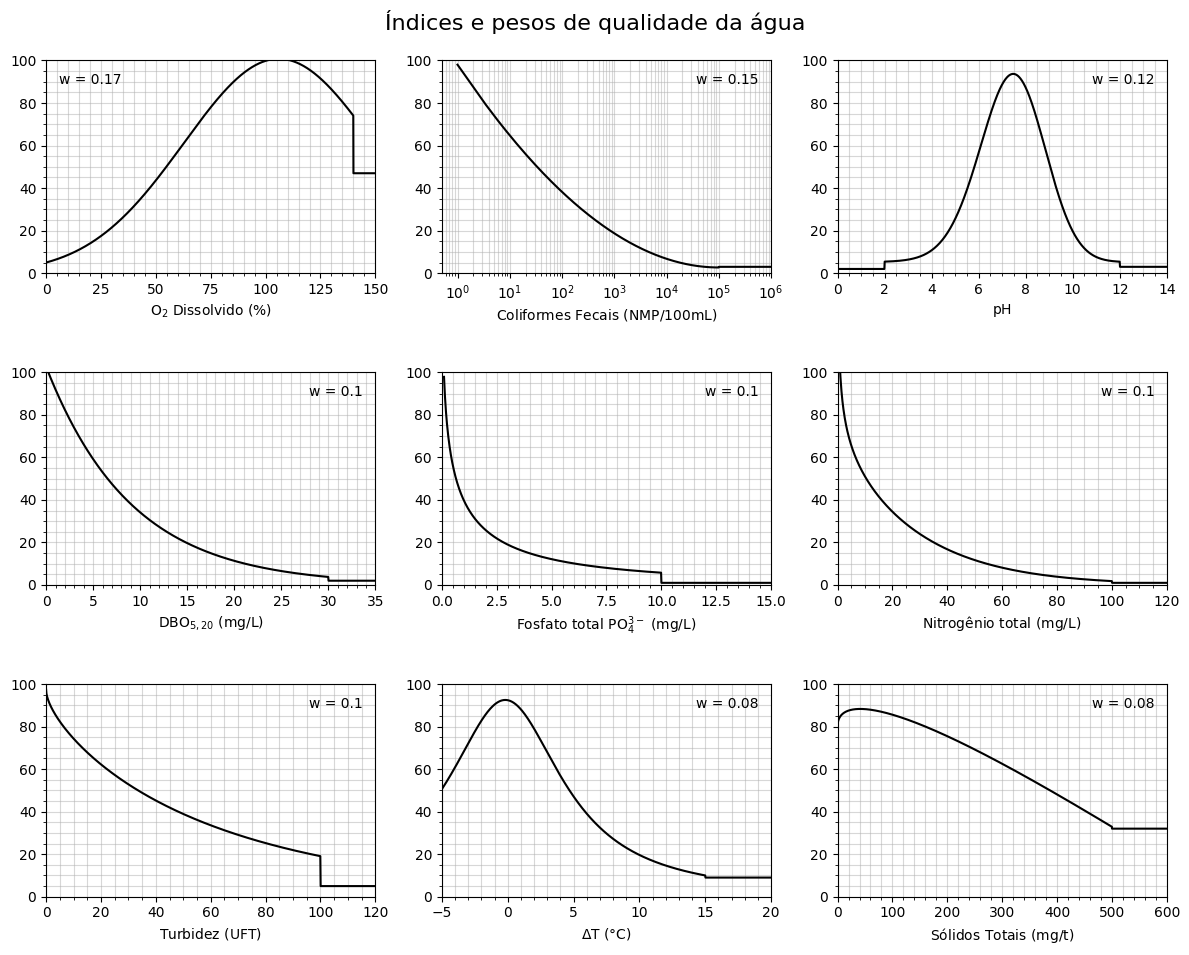

In [270]:

# Criação dos subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

# Labels para as legendas
labels = {'O2': '{O_2} \  Dissolvido \ (\%)', 
          'CF': 'Coliformes \ Fecais \ (NMP/100mL)', 
          'pH': 'pH', 
          'DBO': 'DBO_{5,20} \ (mg/L)', 
          'P': 'Fosfato \ total \ PO_4^{3-} \ (mg/L)',
          'N': 'Nitrogênio \ total \ (mg/L)', 
          'Turb': 'Turbidez \ (UFT)', 
          'Temp': '\Delta T \ (°C)', 
          'ST': 'Sólidos \ Totais \ (mg/t)'}

# Plotagem dos gráficos em cada subplot
plot_grafico(axs[0, 0], x_values['qO2'], functions['qO2'],  labels['O2'], w[0])
plot_grafico(axs[0, 1], x_values['qCF'], functions['qCF'], labels['CF'], w[1])
plot_grafico(axs[0, 2], x_values['qpH'], functions['qpH'],  labels['pH'], w[2])
plot_grafico(axs[1, 0], x_values['qDBO'], functions['qDBO'],  labels['DBO'], w[3])
plot_grafico(axs[1, 1], x_values['qP'], functions['qP'], labels['P'], w[4])
plot_grafico(axs[1, 2], x_values['qN'], functions['qN'],  labels['N'], w[5])
plot_grafico(axs[2, 0], x_values['qTurb'], functions['qTurb'],  labels['Turb'], w[6])
plot_grafico(axs[2, 1], x_values['qTemp'], functions['qTemp'],  labels['Temp'], w[7])
plot_grafico(axs[2, 2], x_values['qST'], functions['qST'],  labels['ST'], w[8])

plt.tight_layout(h_pad=2)

# Ajuste de layout para evitar que suptitle invada espaço do gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=3)
plt.suptitle('Índices e pesos de qualidade da água', fontsize=16)
plt.show()
